In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import networkx as nx
import pickle 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
%load_ext autoreload
%autoreload 3


In [4]:
import sys
sys.path.append('/home/carlos/repos/random-network/random-network/commuters/functions')
from return_net_graph import return_net_graph
from return_g_estado import return_g_estado
import ordpy

In [6]:
edges = pd.read_csv('/home/carlos/repos/random-network/random-network/commuters/data/br_commuters.csv')
info = pd.read_csv('/home/carlos/repos/random-network/random-network/commuters/data/br_info.csv')

In [7]:
estados = info[~(info.STATE=='DF')].STATE.unique()

In [8]:
def cdf(data, nbins=15, log=False, surv=True):
    """
    Estimates the survival distribution from a np.array.

    Parameters
    ----------
    data: np.array
    nbins: number of bins.
    log: True for log-spaced bins (Default: False).
    surv: False for cumulative distribution function (Default: True).
    ----------
    Returns [bins,pdf].
    """
    size = len(data)
    if log:
        bins = np.logspace(np.log10(np.min(data)), np.log10(np.max(data)), nbins)
    else:
        bins = np.linspace(np.min(data), np.max(data),nbins)        
    densities = np.array([len(data[data>=binvalue])/size for binvalue in bins])
    if not surv:
        densities = 1 - densities
    return(np.transpose([bins, densities]))

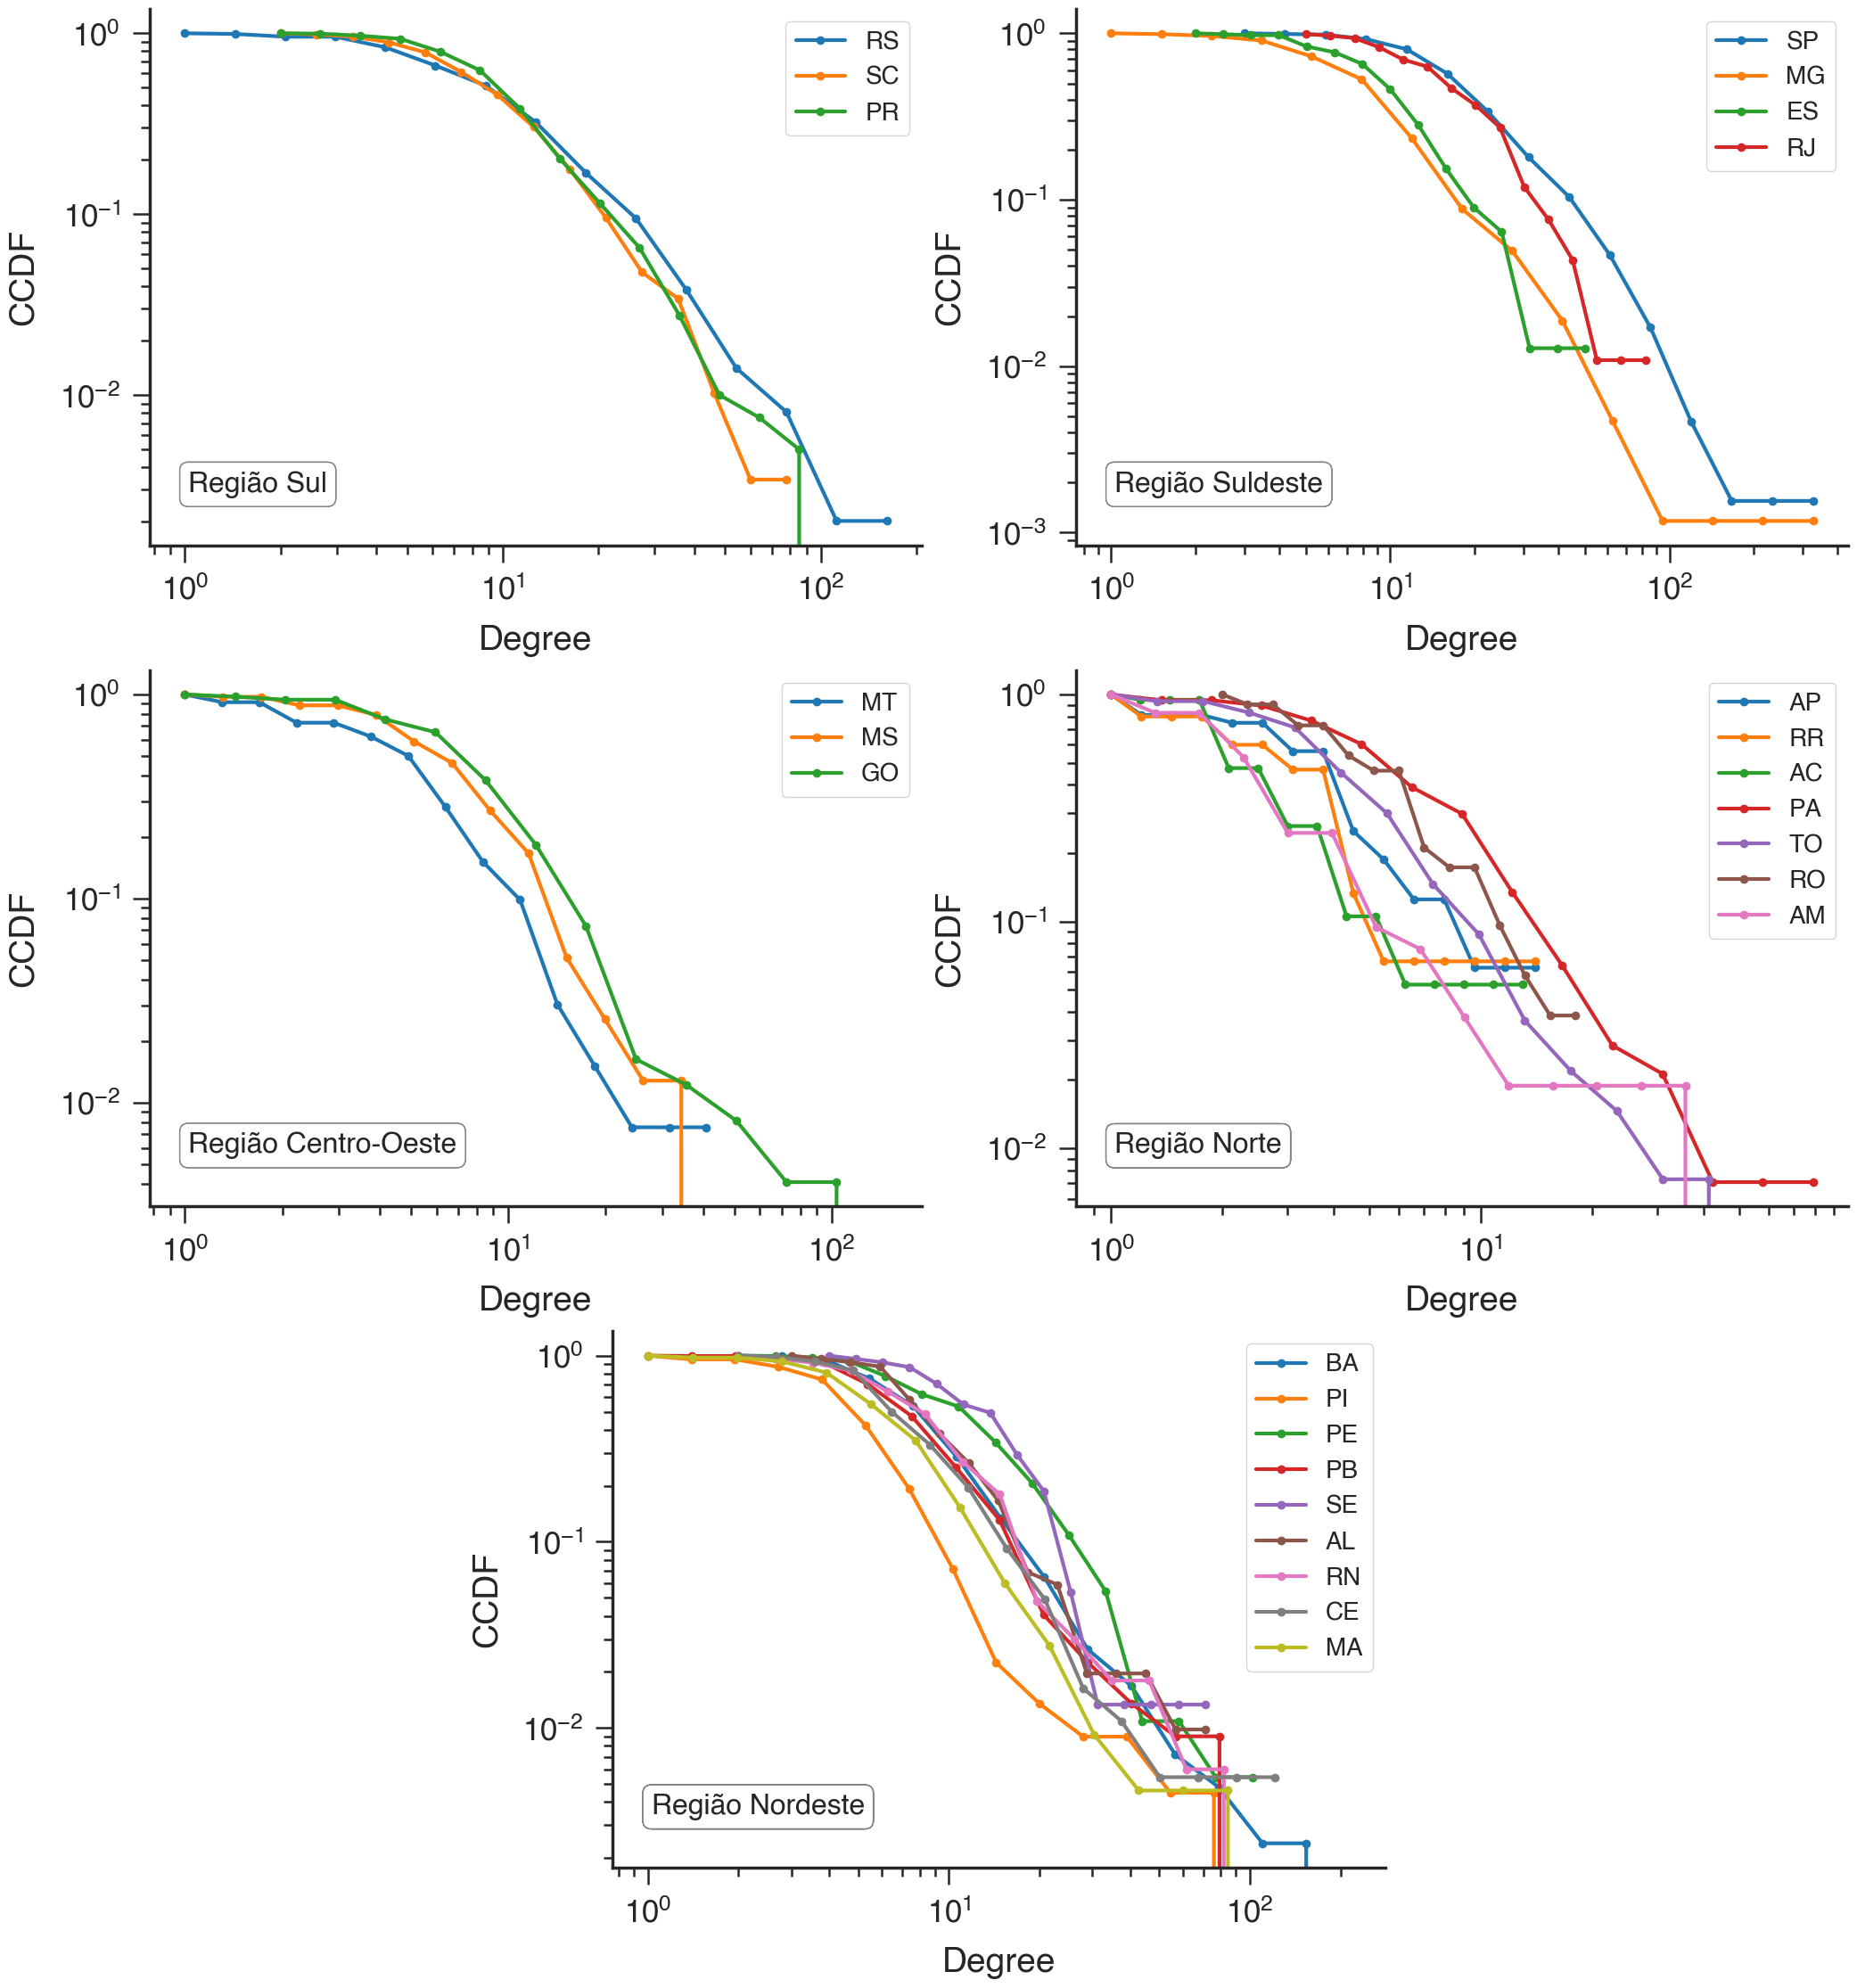

In [9]:
mosaic = 'AABB;AABB;CCDD;CCDD;.EE.;.EE.'
fig = plt.figure(constrained_layout = True,
                 figsize=ordpy.stdfigsize(nrows=3.2,ncols=2.3))
ax_dict = fig.subplot_mosaic(mosaic)
ax = [ax_dict[i] for i in ['A', 'B', 'C', 'D', 'E']]
# mpl.rcParams['axes.prop_cycle'] = sns.color_palette('mako')
sns.set_palette('Paired')
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
posx, posy = 0.05, 0.1

for state in ['RS','SC','PR']:
    grafo_ = return_g_estado(state)
    ax[0].loglog(*cdf(np.asarray(list(dict(grafo_.degree()).values())),log=True).T,'-o',label=state)
    ax[0].legend()
    ax[0].set_xlabel('Degree')
    ax[0].set_ylabel('CCDF')
    ax[0].text(posx, posy, "Região Sul", size=23, transform = ax[0].transAxes,
        bbox=bbox_props)

for state in ['SP','MG','ES','RJ']:
    grafo_ = return_g_estado(state)
    ax[1].loglog(*cdf(np.asarray(list(dict(grafo_.degree()).values())),log=True).T,'-o',label=state)
    ax[1].legend()
    ax[1].set_xlabel('Degree')
    ax[1].set_ylabel('CCDF')
    ax[1].text(posx, posy, "Região Suldeste", size=23, transform = ax[1].transAxes,
        bbox=bbox_props)

for state in ['MT','MS','GO']:
    grafo_ = return_g_estado(state)
    ax[2].loglog(*cdf(np.asarray(list(dict(grafo_.degree()).values())),log=True).T,'-o',label=state)
    ax[2].legend()
    ax[2].set_xlabel('Degree')
    ax[2].set_ylabel('CCDF')
    ax[2].text(posx, posy, "Região Centro-Oeste", size=23, transform = ax[2].transAxes,
        bbox=bbox_props)

for state in ['AP', 'RR', 'AC', 'PA', 'TO', 'RO', 'AM']:
    grafo_ = return_g_estado(state)
    ax[3].loglog(*cdf(np.asarray(list(dict(grafo_.degree()).values())),log=True).T,'-o',label=state)
    ax[3].legend()
    ax[3].set_xlabel('Degree')
    ax[3].set_ylabel('CCDF')
    ax[3].text(posx, posy, "Região Norte",  size=23, transform = ax[3].transAxes,
        bbox=bbox_props)


for state in ['BA', 'PI', 'PE', 'PB', 'SE', 'AL', 'RN', 'CE', 'MA']:
    grafo_ = return_g_estado(state)
    ax[4].loglog(*cdf(np.asarray(list(dict(grafo_.degree()).values())),log=True).T,'-o',label=state)
    ax[4].legend()
    ax[4].set_xlabel('Degree')
    ax[4].set_ylabel('CCDF')
    ax[4].text(posx, posy, "Região Nordeste", size=23, transform = ax[4].transAxes,
        bbox=bbox_props)
    

fig.tight_layout()
# fig.savefig('../figures/cdf-regions.png', dpi=300, bbox_inches='tight')



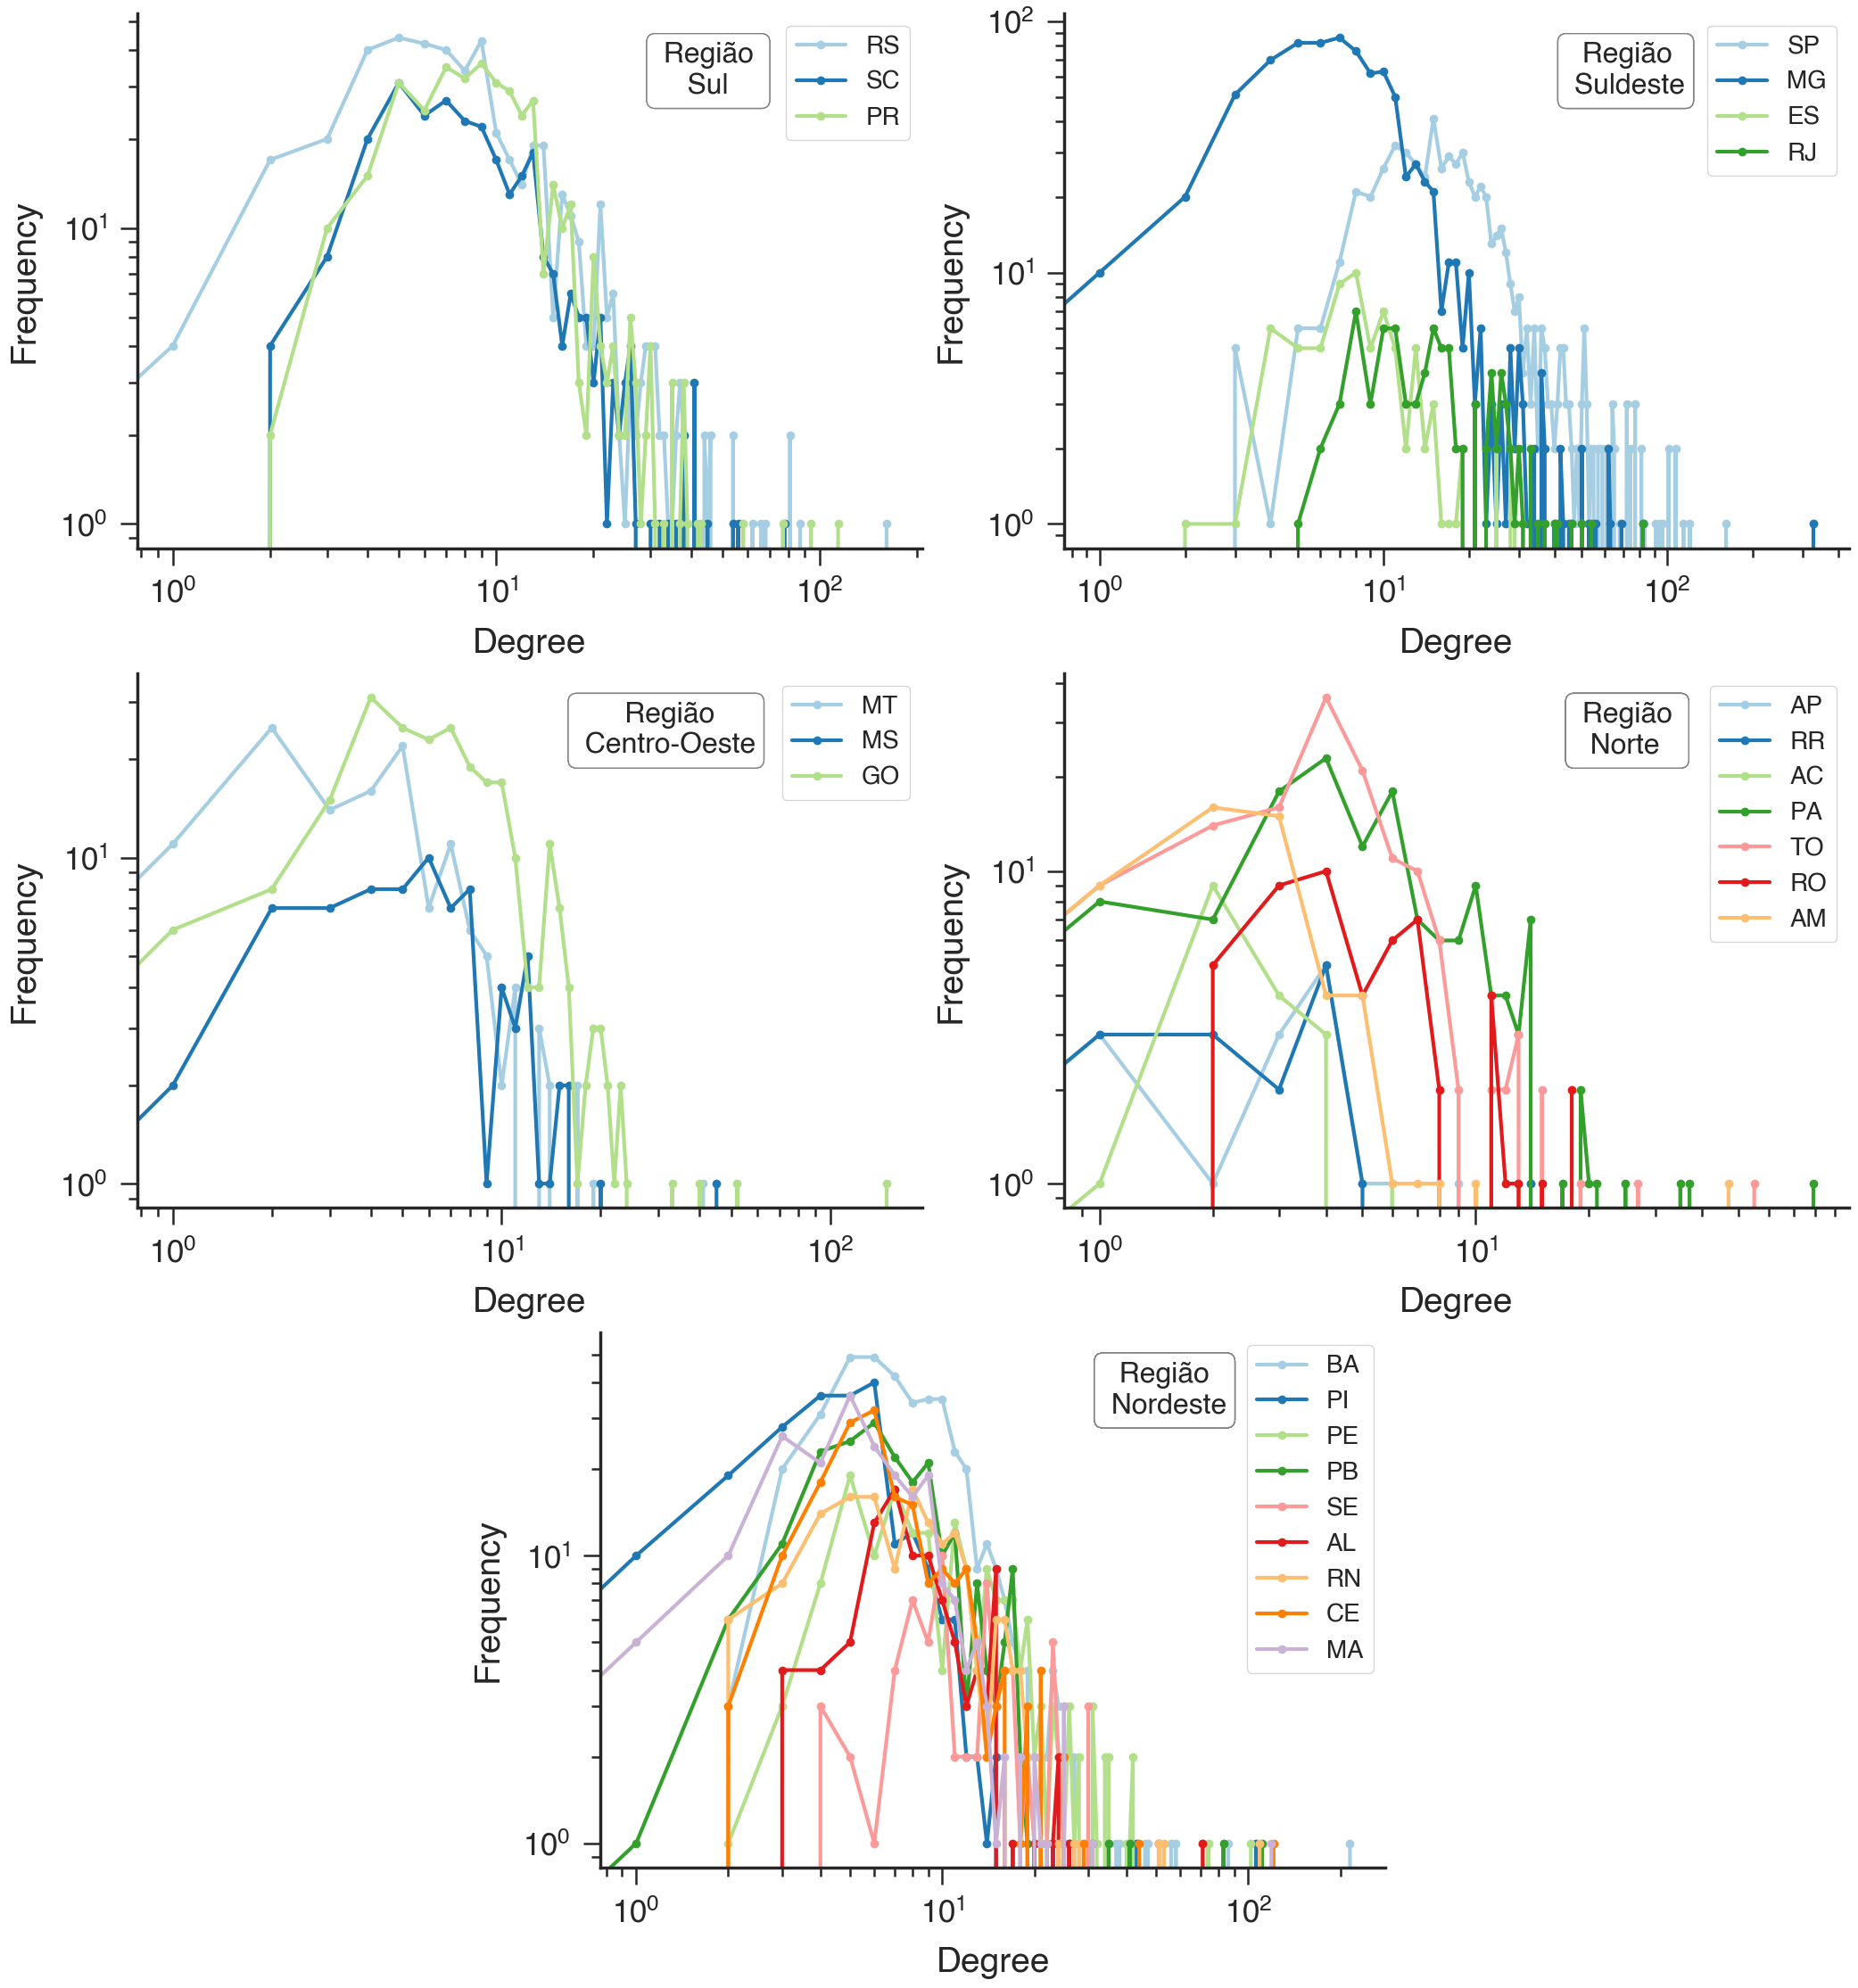

In [66]:
mosaic = 'AABB;AABB;CCDD;CCDD;.EE.;.EE.'
fig = plt.figure(constrained_layout = True,
                 figsize=ordpy.stdfigsize(nrows=3.2,ncols=2.3))
ax_dict = fig.subplot_mosaic(mosaic)
ax = [ax_dict[i] for i in ['A', 'B', 'C', 'D', 'E']]
posx_, posy_ = 0.56, 0.85
size_font = 23

for state in ['RS', 'SC', 'PR']:
    grafos_estados = return_g_estado(state)
    degree_freq_sta = nx.degree_histogram(grafos_estados)
    degrees_sta = range(len(degree_freq_sta))
    ax[0].loglog(degrees_sta, degree_freq_sta, 'o-', label=state)
    ax[0].set_xlabel('Degree')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].text(.66, posy_, " Região \n    Sul", size=size_font, transform = ax[0].transAxes,
        bbox=bbox_props)
    
for state in ['SP','MG','ES','RJ']:
    grafos_estados = return_g_estado(state)
    degree_freq_sta = nx.degree_histogram(grafos_estados)
    degrees_sta = range(len(degree_freq_sta))
    ax[1].loglog(degrees_sta, degree_freq_sta, 'o-', label=state)
    ax[1].set_xlabel('Degree')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()
    ax[1].text(.64, posy_, "  Região \n Suldeste", size=size_font, transform = ax[1].transAxes,
        bbox=bbox_props)
    
for state in ['MT','MS','GO']:
    grafos_estados = return_g_estado(state)
    degree_freq_sta = nx.degree_histogram(grafos_estados)
    degrees_sta = range(len(degree_freq_sta))
    ax[2].loglog(degrees_sta, degree_freq_sta, 'o-', label=state)
    ax[2].set_xlabel('Degree')
    ax[2].set_ylabel('Frequency')
    ax[2].legend()
    ax[2].text(posx_, posy_, "      Região \n Centro-Oeste", size=size_font, transform = ax[2].transAxes,
        bbox=bbox_props)
    
for state in ['AP', 'RR', 'AC', 'PA', 'TO', 'RO', 'AM']:
    grafos_estados = return_g_estado(state)
    degree_freq_sta = nx.degree_histogram(grafos_estados)
    degrees_sta = range(len(degree_freq_sta))
    ax[3].loglog(degrees_sta, degree_freq_sta, 'o-', label=state)
    ax[3].set_xlabel('Degree')
    ax[3].set_ylabel('Frequency')
    ax[3].legend()
    ax[3].text(.65, posy_, " Região \n  Norte", size=size_font, transform = ax[3].transAxes,
        bbox=bbox_props)
    
for state in ['BA', 'PI', 'PE', 'PB', 'SE', 'AL', 'RN', 'CE', 'MA']:
    grafos_estados = return_g_estado(state)
    degree_freq_sta = nx.degree_histogram(grafos_estados)
    degrees_sta = range(len(degree_freq_sta))
    ax[4].loglog(degrees_sta, degree_freq_sta, 'o-', label=state)
    ax[4].set_xlabel('Degree')
    ax[4].set_ylabel('Frequency')
    ax[4].legend()
    ax[4].text(.64, posy_, "  Região \n Nordeste", size=size_font, transform = ax[4].transAxes,
        bbox=bbox_props)
    
fig.tight_layout()
# fig.savefig('../../figures/frequency-regions.png', dpi=300, bbox_inches='tight')